## EDU on col

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmw = pd.read_csv("BMW Used Car Sales/bmw.csv")

In [3]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


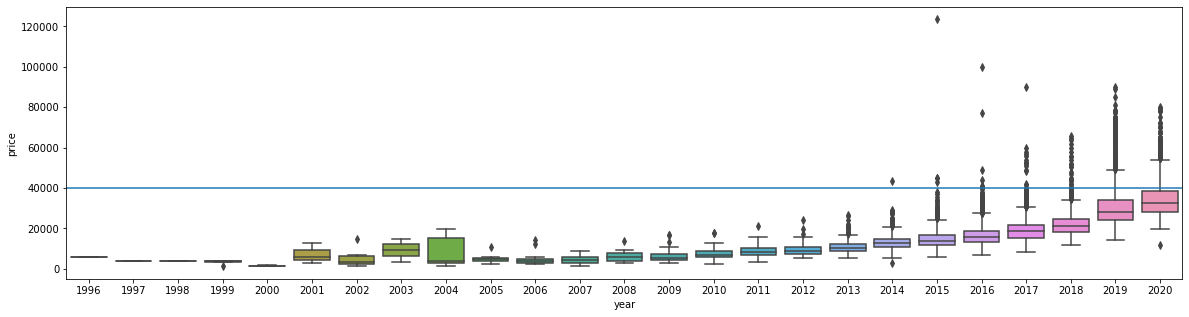

In [4]:
plt.subplots(figsize=(20, 5))
sns.boxplot(x="year", y="price", data=bmw)
plt.axhline(y=40000)

<AxesSubplot:xlabel='mileage', ylabel='price'>

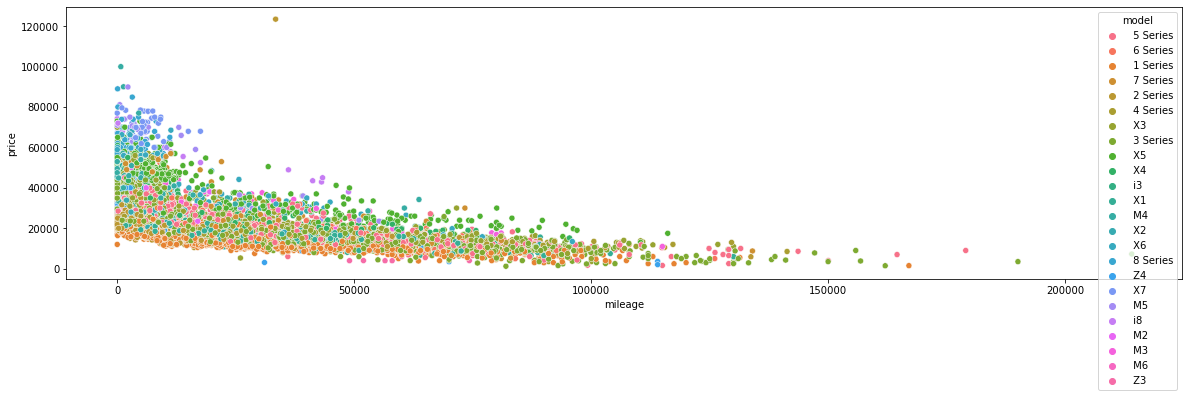

In [5]:
plt.subplots(figsize=(20, 5))
sns.scatterplot(x="mileage", y="price", data=bmw, hue="model")

<AxesSubplot:xlabel='model', ylabel='count'>

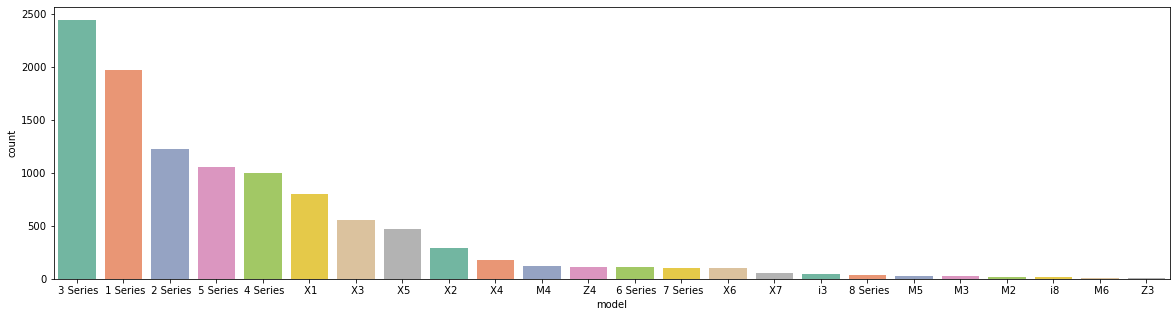

In [6]:
# models = bmw["model"].value_counts()
# models_df = pd.DataFrame(models).reset_index()
# models_df.rename(columns={"index":"model","model":"number"}, inplace=True)
plt.subplots(figsize=(20, 5))
sns.countplot(x="model", data=bmw, order = bmw['model'].value_counts().index, palette="Set2")

<AxesSubplot:xlabel='year', ylabel='count'>

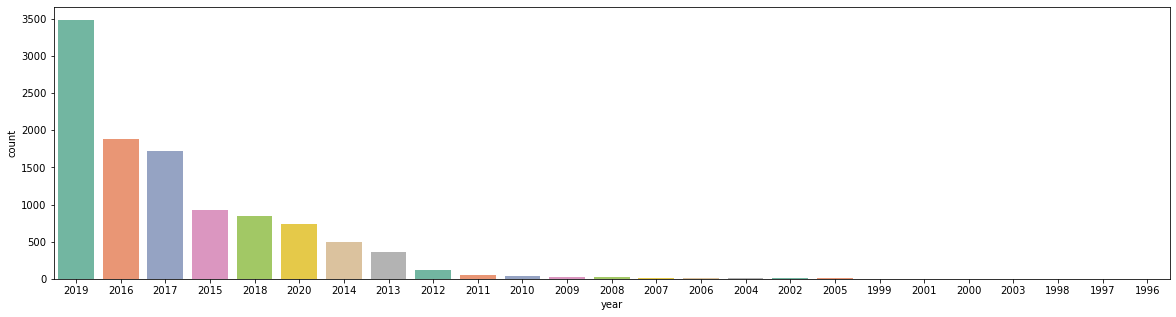

In [7]:
plt.subplots(figsize=(20, 5))
sns.countplot(x="year", data=bmw, order = bmw['year'].value_counts().index, palette="Set2")

<AxesSubplot:xlabel='transmission', ylabel='count'>

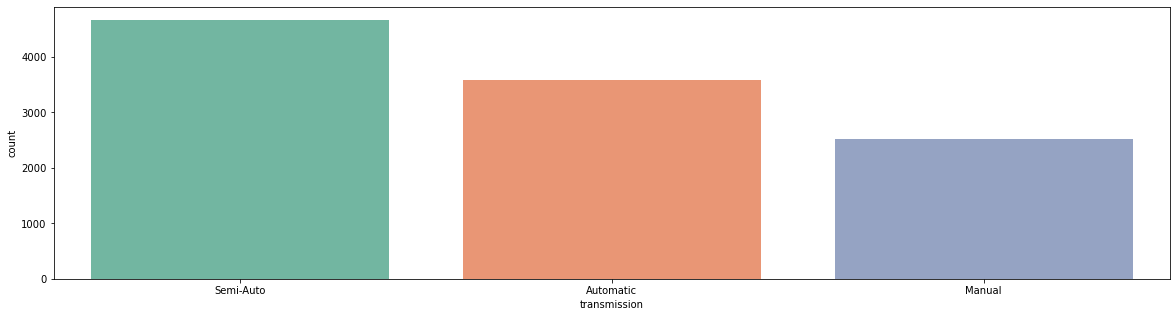

In [8]:
plt.subplots(figsize=(20, 5))
sns.countplot(x="transmission", data=bmw, order = bmw['transmission'].value_counts().index, palette="Set2")

(array([5.830e+03, 2.679e+03, 1.295e+03, 6.570e+02, 2.370e+02, 4.900e+01,
        2.400e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([1.000000e+00, 2.140090e+04, 4.280080e+04, 6.420070e+04,
        8.560060e+04, 1.070005e+05, 1.284004e+05, 1.498003e+05,
        1.712002e+05, 1.926001e+05, 2.140000e+05]),
 <BarContainer object of 10 artists>)

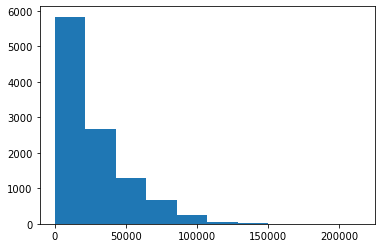

In [9]:
plt.hist(bmw.mileage)

<AxesSubplot:xlabel='engineSize', ylabel='count'>

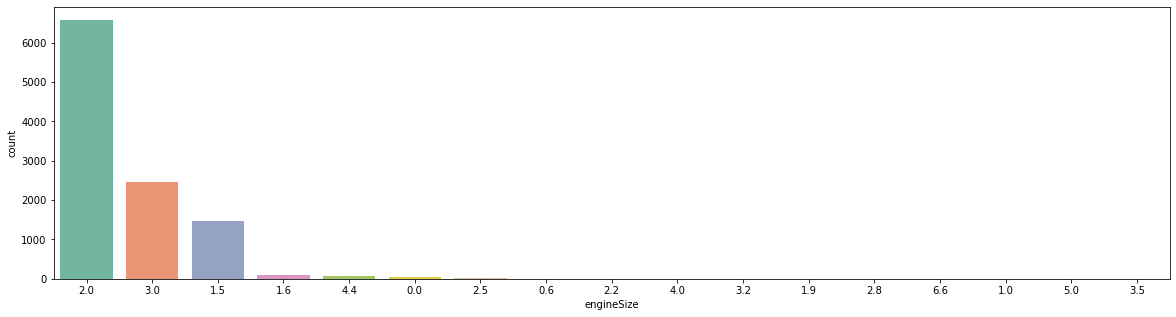

In [10]:
plt.subplots(figsize=(20, 5))
sns.countplot(x="engineSize", data=bmw, order = bmw['engineSize'].value_counts().index, palette="Set2")

In [11]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


<AxesSubplot:>

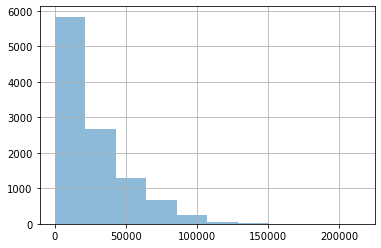

In [12]:
bmw.mileage.hist(bins=10, alpha=0.5)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

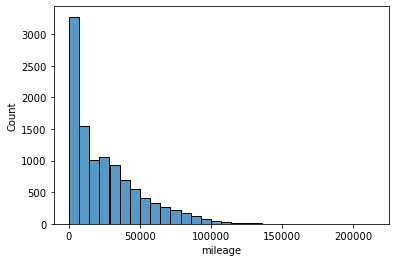

In [13]:
sns.histplot(x="mileage", data=bmw, bins=30)

In [14]:
bmw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [15]:
a = bmw.groupby(['transmission','fuelType', 'engineSize'])["model"].value_counts()
b = pd.DataFrame(a)
b[["model"]].max()

model    522
dtype: int64

In [16]:
b.loc[b["model"]==522,:]

,,,,model
transmission,fuelType,engineSize,model,
Semi-Auto,Diesel,2.0,3 Series,522


In [17]:
c = bmw.loc[
    (bmw.transmission == "Semi-Auto")&
    (bmw.fuelType == "Diesel")&
    (bmw.engineSize == 2.0),:
]

c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
89,1 Series,2015,15499,Semi-Auto,20000,Diesel,125,60.1,2.0
91,1 Series,2014,10600,Semi-Auto,44900,Diesel,30,64.2,2.0
92,X3,2017,23000,Semi-Auto,16945,Diesel,150,54.3,2.0
165,4 Series,2015,15998,Semi-Auto,62943,Diesel,30,65.7,2.0
166,X1,2020,31498,Semi-Auto,1560,Diesel,145,60.1,2.0
...,...,...,...,...,...,...,...,...,...
7333,X1,2013,12685,Semi-Auto,60926,Diesel,160,52.3,2.0
7336,1 Series,2019,18685,Semi-Auto,11423,Diesel,145,74.3,2.0
7346,2 Series,2015,15685,Semi-Auto,24862,Diesel,30,64.2,2.0
7353,X1,2017,16485,Semi-Auto,56728,Diesel,145,65.7,2.0


In [18]:
import statsmodels.formula.api as smf

In [19]:
Results = smf.ols(formula="price ~ engineSize + year + C(model)", data=bmw).fit()
Results.params


Intercept               -5.876889e+06
C(model)[T. 2 Series]    2.966541e+02
C(model)[T. 3 Series]    2.446994e+03
C(model)[T. 4 Series]    2.438311e+03
C(model)[T. 5 Series]    4.308389e+03
C(model)[T. 6 Series]    5.428494e+03
C(model)[T. 7 Series]    1.377527e+04
C(model)[T. 8 Series]    3.394424e+04
C(model)[T. M2]          1.523159e+04
C(model)[T. M3]          1.835968e+04
C(model)[T. M4]          1.760739e+04
C(model)[T. M5]          2.664300e+04
C(model)[T. M6]          1.105760e+04
C(model)[T. X1]          2.654022e+03
C(model)[T. X2]          5.021805e+03
C(model)[T. X3]          8.828654e+03
C(model)[T. X4]          1.025321e+04
C(model)[T. X5]          1.675862e+04
C(model)[T. X6]          1.967104e+04
C(model)[T. X7]          4.105240e+04
C(model)[T. Z3]          4.007378e+04
C(model)[T. Z4]          7.801979e+03
C(model)[T. i3]          1.211184e+04
C(model)[T. i8]          4.100358e+04
engineSize               4.707624e+03
year                     2.917689e+03
dtype: float

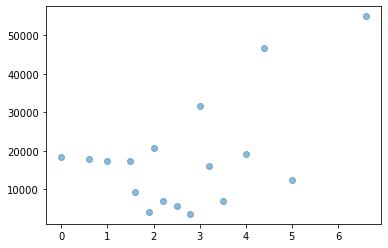

In [20]:
grouped = bmw.groupby("engineSize")
mean_prince_by_engine = grouped["price"].mean()
plt.plot(mean_prince_by_engine, "o", alpha=0.5)

In [21]:
df = pd.DataFrame()
df["engineSize"] = np.linspace(0, 8)
df["year"] = 2000
df["model"] = " 1 Series"

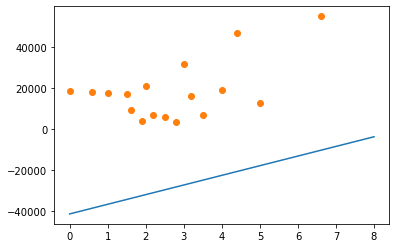

In [22]:
pred_yr = Results.predict(df)
plt.plot(df["engineSize"], pred_yr, label="year")
plt.plot(mean_prince_by_engine, "o")

In [23]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [24]:
a = bmw["year"].value_counts(normalize=True).sort_index().cumsum()

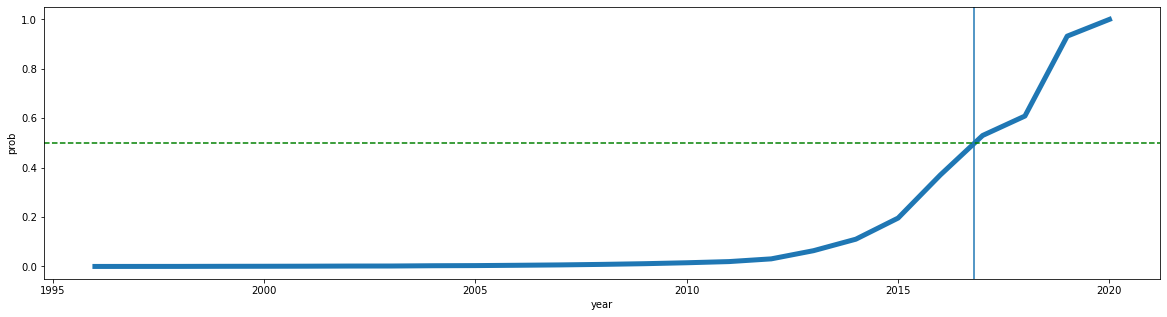

In [29]:
plt.subplots(figsize=(20, 5))
b = pd.DataFrame(a).reset_index()
b.rename(columns={"index":"year", "year":"prob"}, inplace=True)
sns.lineplot(data=b, x="year", y="prob", linewidth=5)
plt.axhline(y=0.5, linestyle="--", color="green")
plt.axvline(x=2016.8)
# plt.annotate("median", xy=(1.08,500), xytext=(1.18,500), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))
# plt.annotate("Outlier threshold", xy=(1.05,1.05), xytext=(1.15,1.15), size=7, arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02))

Text(0.5, 1.0, 'Prices of cars')

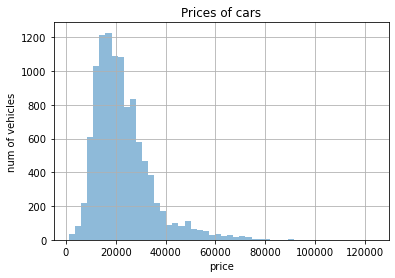

In [31]:
target = bmw[["price"]]

target.price.hist(bins=50, alpha=0.5)

plt.xlabel("price")
plt.ylabel("num of vehicles")
plt.title("Prices of cars")

In [32]:
bmw.transmission.value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [36]:
c = bmw.groupby(["model"])["transmission"].value_counts()

In [40]:
bmw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [42]:
col_arr = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax','mpg', 'engineSize','price']
bmw[col_arr]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0,11200
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0,27000
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0,16000
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5,12750
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0,14500
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0,19000
10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0,14600
10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0,13100
10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0,9930


In [44]:
results = smf.ols("price ~ year + mileage", data=bmw).fit()
results.params

Intercept   -3.767692e+06
year         1.880920e+03
mileage     -1.387824e-01
dtype: float64

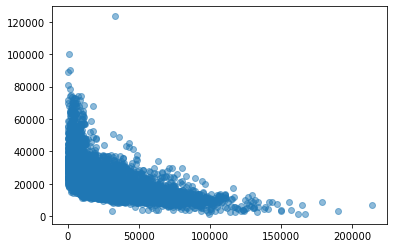

In [48]:
grouped = bmw.groupby("mileage")
mean_price_by_mileage = grouped["price"].mean()
plt.plot(mean_price_by_mileage, "o", alpha=0.5)

In [56]:
df = pd.DataFrame()
df["mileage"] = np.linspace(0, 200000)
df["mileage2"] = df["mileage"]**2
df["year"] = 2020
df["year2"] = df["year"]**2

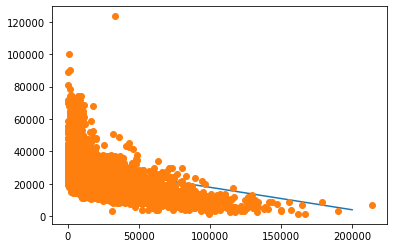

In [58]:
pred2000 = results.predict(df)
plt.plot(df["mileage"], pred2000, label="2000")
plt.plot(mean_price_by_mileage, "o")
